In [1]:
import pickle
import numpy as np
import pandas as pd
import io
import scipy.stats as scs
import matplotlib.pyplot as plt
f = open("subscribers",'rb')
subscribers = pickle.load(f)
f.close()
f = open("engagement",'rb')
engagement = pickle.load(f)
f.close()
f = open("customer_service_reps",'rb')
customer_service_reps = pickle.load(f)
f.close()


In [150]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
subscribers.columns

Index(['subid', 'package_type', 'num_weekly_services_utilized',
       'preferred_genre', 'intended_use', 'weekly_consumption_hour',
       'num_ideal_streaming_services', 'retarget_TF', 'age', 'male_TF',
       'country', 'attribution_technical', 'attribution_survey', 'op_sys',
       'months_per_bill_period', 'plan_type', 'monthly_price',
       'discount_price', 'account_creation_date', 'creation_until_cancel_days',
       'cancel_before_trial_end', 'trial_end_date',
       'initial_credit_card_declined', 'revenue_net', 'join_fee', 'language',
       'paid_TF', 'refund_after_trial_TF', 'payment_type'],
      dtype='object')

In [3]:
subscribers.head()

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,...,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type
162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,...,NaN,True,2020-02-08,False,NaN,NaN,ar,True,False,Standard Charter
380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,...,0.0,False,2020-03-16,False,0.0,0.3303,ar,False,False,NaN
496617,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,...,1.0,False,2019-12-22,False,0.0,0.1101,ar,False,False,NaN
356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,...,0.0,False,2020-02-11,False,0.0,0.0367,ar,False,False,NaN
681701,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,...,9.0,False,2019-10-20,False,0.0,0.0367,ar,False,False,NaN


In [4]:
len(subscribers)

227628

In [5]:
engagement.head()

,subid,date,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period
1,22349235,2019-07-01,1.0,1.0,0.0,6.0,0.0,0.0,0.0
2,22349235,2019-07-02,1.0,0.0,0.0,5.0,0.0,0.0,0.0
3,22349235,2019-07-03,0.0,1.0,0.0,0.0,0.0,0.0,0.0
50,20848497,2019-07-02,1.0,0.0,7.0,7.0,0.0,0.0,0.0
51,22680106,2019-07-02,2.0,1.0,7.0,7.0,0.0,1.0,0.0


In [6]:
len(engagement)

2585724

In [7]:
customer_service_reps.head()

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
4,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,0,2019-11-26 03:30:29,2019-11-26 03:30:29,NaN
5,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,1,2019-11-26 03:30:29,2019-12-27 03:30:29,NaN
6,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,2,2019-12-27 03:30:29,2020-01-26 03:30:29,NaN
7,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,3,2020-01-26 03:30:29,NaT,NaN
8,31174901,25914865,True,NaT,2020-03-19 01:20:25,14,True,itunes,1.1377,0,2020-03-19 01:20:25,2020-04-02 01:20:25,NaN


In [8]:
len(customer_service_reps)

2208643

Consultant will
execute at least 2 marketing analyses of the following identified priorities:

• AB testing to understand what marketing strategies have been most effective to date

• Customer segmentation to help the marketing team design acquisition strategies
supporting the Executive team’s growth objective


• Advertising channel spend efficiency and effectiveness, supporting the advertising
team’s budget allocation for the upcoming quarter

In addition:

• Consultant will build a churn model and develop recommendation(s)
on an alternative product pricing structure as well as a distribution of expected CLV,
representing the uncertainty of future payments given the current customer base.

# 1 AB testing  (renew)

In [9]:
'''
AB testing to understand what marketing strategies have been most effective to date
'''

'\nAB testing to understand what marketing strategies have been most effective to date\n'

In [10]:
# data :  subscribers
# step
subscribers['plan_type'].value_counts()

base_uae_14_day_trial                227096
high_uae_14_day_trial                   325
low_uae_no_trial                        167
base_eur_14_day_trial                    18
high_sar_14_day_trial                    12
low_gbp_14_day_trial                      4
high_aud_14_day_trial                     2
low_sar_no_trial                          1
low_eur_no_trial                          1
high_jpy_14_day_trial                     1
base_uae_no_trial_7_day_guarantee         1
Name: plan_type, dtype: int64

In [11]:
subscribers.columns


Index(['subid', 'package_type', 'num_weekly_services_utilized',
       'preferred_genre', 'intended_use', 'weekly_consumption_hour',
       'num_ideal_streaming_services', 'retarget_TF', 'age', 'male_TF',
       'country', 'attribution_technical', 'attribution_survey', 'op_sys',
       'months_per_bill_period', 'plan_type', 'monthly_price',
       'discount_price', 'account_creation_date', 'creation_until_cancel_days',
       'cancel_before_trial_end', 'trial_end_date',
       'initial_credit_card_declined', 'revenue_net', 'join_fee', 'language',
       'paid_TF', 'refund_after_trial_TF', 'payment_type'],
      dtype='object')

In [12]:
df = subscribers.merge(customer_service_reps[['subid','renew']],on=['subid'])

In [13]:
df['renew'].value_counts()

False    129302
True      73146
Name: renew, dtype: int64

In [14]:
df['plan_type'].value_counts()

base_uae_14_day_trial                209383
high_uae_14_day_trial                   375
low_uae_no_trial                         88
base_eur_14_day_trial                    23
high_sar_14_day_trial                    15
high_aud_14_day_trial                     5
high_jpy_14_day_trial                     2
base_uae_no_trial_7_day_guarantee         2
low_gbp_14_day_trial                      1
Name: plan_type, dtype: int64

In [15]:
# pd.DataFrame(list(a),index=a.index, columns=['paid'])

In [16]:
df['renew'] = df['renew'].astype(float)

In [17]:
df.groupby(['plan_type']).sum()['renew']

plan_type
base_eur_14_day_trial                   13.0
base_uae_14_day_trial                72971.0
base_uae_no_trial_7_day_guarantee        0.0
high_aud_14_day_trial                    2.0
high_jpy_14_day_trial                    1.0
high_sar_14_day_trial                    5.0
high_uae_14_day_trial                  129.0
low_gbp_14_day_trial                     0.0
low_uae_no_trial                        25.0
Name: renew, dtype: float64

In [18]:
a = df.groupby(['plan_type']).sum()['renew']

In [19]:
dataframe = pd.DataFrame(list(a),index=a.index, columns=['rew']).merge(df['plan_type'].value_counts(),left_on=None, right_on=None, left_index=True, right_index=True)
dataframe.columns = ['renew','all']
dataframe['coversion_rate'] = dataframe['renew']/dataframe['all']

In [20]:
dataframe.sort_values(by='coversion_rate', ascending = False)

,renew,all,coversion_rate
base_eur_14_day_trial,13.0,23,0.565217
high_jpy_14_day_trial,1.0,2,0.500000
high_aud_14_day_trial,2.0,5,0.400000
base_uae_14_day_trial,72971.0,209383,0.348505
high_uae_14_day_trial,129.0,375,0.344000
high_sar_14_day_trial,5.0,15,0.333333
low_uae_no_trial,25.0,88,0.284091
base_uae_no_trial_7_day_guarantee,0.0,2,0.000000
low_gbp_14_day_trial,0.0,1,0.000000


In [21]:
def generate_data(N_A, N_B, p_A, p_B, days=None, control_label='A',
                  test_label='B'):
    """Returns a pandas dataframe with fake subscribers data

    Example:

    Parameters:
        N_A (int): sample size for control group
        N_B (int): sample size for test group
            Note: final sample size may not match N_A provided because the
            group at each row is chosen at random (50/50).
        p_A (float): conversion rate; conversion rate of control group
        p_B (float): conversion rate; conversion rate of test group
        days (int): optional; if provided, a column for 'ts' will be included
            to divide the data in chunks of time
            Note: overflow data will be included in an extra day
        control_label (str)
        test_label (str)

    Returns:
        df (df)
    """

    # initiate empty container
    data = []

    # total amount of rows in the data
    N = N_A + N_B

    # distribute events based on proportion of group size
    group_bern = scs.bernoulli(N_A / (N_A + N_B))

    # initiate bernoulli distributions from which to randomly sample
    A_bern = scs.bernoulli(p_A)
    B_bern = scs.bernoulli(p_B)

    for idx in range(N):
        # initite empty row
        row = {}
        # for 'ts' column
        if days is not None:
            if type(days) == int:
                row['ts'] = idx // (N // days)
            else:
                raise ValueError("Provide an integer for the days parameter.")
        # assign group based on 50/50 probability
        row['group'] = group_bern.rvs()

        if row['group'] == 0:
            # assign conversion based on provided parameters
            row['converted'] = A_bern.rvs()
        else:
            row['converted'] = B_bern.rvs()
        # collect row into data container
        data.append(row)

    # convert data into pandas dataframe
    df = pd.DataFrame(data)

    # transform group labels of 0s and 1s to user-defined group labels
    df['group'] = df['group'].apply(
        lambda x: control_label if x == 0 else test_label)

    return df




**Hypothesis setup:**


Variant B: high_uae_14_day_trial

Variant A: base_uae_14_day_trial

Null Hypothesis $H_{0}$: Variant B and Variant A had the same conversion rates 

Alternative hypothesis $H_{A}$: Variant B had a lower conversion rate than Variant A

**Assumptions:**
1. Variant A represents the population and we can treat the population mean as known and equal to the mean of Variant A.

In [22]:
# AB test
# Variant A high_uae_14_day_trial   328.0 	715
# Variant B base_uae_14_day_trial   182690.0 	397785 
N_B = 715
N_A = 397785
p_B = 328/715
p_A = 182690/397785
df = generate_data(N_A, N_B, p_A, p_B, days=None, control_label='A',
                  test_label='B')
df.columns = ['Variant', 'purchase_TF']
df.head()

,Variant,purchase_TF
0,B,0
1,B,0
2,B,1
3,B,0
4,B,1


##### Conducting the test

In [23]:
# calculate our z score
p_treatment = df[df["Variant"]=="B"]['purchase_TF'].sum()/len(df[df["Variant"]=="B"]['purchase_TF'])
p_varA = df[df["Variant"]=="A"]['purchase_TF'].sum()/len(df[df["Variant"]=="A"]['purchase_TF'])
n = len(df[df["Variant"]=="B"]['purchase_TF'])
z = (p_treatment-p_varA)/(((p_varA*(1-p_varA))/n)**0.5)
if abs(z) > 1.64:
    print("We reject the null. The conversion rate of variant B is significantly lower than that of variant A.")
    print("Our Z score is {}.".format(z))
else:
    print("Test failed. The old version is not that different from the new in terms of conversion rate.")

We reject the null. The conversion rate of variant B is significantly lower than that of variant A.
Our Z score is -4.0986849282588995.


In [24]:
z

-4.0986849282588995

With 95% confidence level, $Z_{0.05}$ = 1.64. Reject null if z > 1.64. Since z is 2.20, **we reject the null hypothesis and conclude that at 95% confidence level, variant B generates less conversion than variant A.**

##### Optimal Sample Size

In [25]:
# Calculate optumal sample size
t_alpha = 1.96
t_beta = 0.842
p0 = p_varA
p1 = p_treatment
delta = p1-p0
p_bar = (p0+p1)/2

# plug into the formula
n_star = ((t_alpha*((2*p_bar*(1-p_bar))**.5)+(t_beta*((p0*(1-p0)+p1*(1-p1))**.5)))**2)*(delta**-2)
print("The optimal sample size for each segment is {}".format(n_star))

The optimal sample size for each segment is 371615.521812394


In [26]:
# # seperate treatment and control groups
# A = df[df["Variant"]=="A"]
# B = df[df["Variant"]=="B"]

In [27]:
# # test using 1-sample 

# log = []
# sample_list = []
# for i in range(10):
# #     n = 360083869

#     sample_B = B.sample(n=n,replace=True)
#     sample_list.append(sample_B)


#     convB = sample_B['purchase_TF'].sum()/n

#     z_sample = (convB-p_varA)/(((p_varA*(1-p_varA))/n)**0.5)
#     if z_sample >= 1.64:
#         log.append(1) # reject Null - Variant B is better 
   
#     else:
#         log.append(0) # fail to reject Null - Variant B is NOT better 
        
        
# print("The challenger wins {}% of the time.".format(sum(log)/len(log)*100))

##### Sequential Testing

Assume P(Xi=1) under H0 = p-varA and P(Xi=1) under H1 = p-treatment.

Set desired type 1 error = 5% and type 2 error = 20%.

In [28]:
# # using the same sample as in part 2

# # set parameters 
# n = 1198
# n_trials = 10
# alpha = .05
# beta = .2
# min_diff = p_treatment-p_varA # from original dataset
# upper_bound = np.log(1/alpha)
# lower_bound = np.log(beta)

# # test each observation in the sample:
# list_of_trials = []
# number_of_success = 0

# for j in range(len(sample_list)):
#     sample_B = sample_list[j]
#     log_lambda_n = 0
#     for i in range(len(sample_B)):  
        
#         # update log_lambda_n
#         if sample_B['purchase_TF'].iloc[i] == True:
#             log_lambda_xi = np.log(p_treatment/p_varA)               
#         else:
#             log_lambda_xi = np.log((1-p_treatment)/(1-p_varA))

#         log_lambda_n += log_lambda_xi
        
        
#         # check if log_lambda_n is out of bounds
#         if log_lambda_n > upper_bound: # Accept H1
#             number_of_success += 1
#             break 
        
#         elif log_lambda_n < lower_bound: # Accept H0
#             break
            
#     list_of_trials.append(i+1) # record the number of iterations required to stop test 
    
# print("Success rate is {}%".format(number_of_success/n_trials*100))

In [29]:
# get the avg number of iterations required to stop the test
# np.mean(list_of_trials)

In [30]:
# examine the list of trial number 
# list_of_trials

# 2 Customer segmentation

In [31]:
'''
Customer segmentation to help the marketing team design acquisition strategies
supporting the Executive team’s growth objective
'''

'\nCustomer segmentation to help the marketing team design acquisition strategies\nsupporting the Executive team’s growth objective\n'

In [32]:
# data :  subscribers 
# step
df = engagement.copy()
# add other dataframe
df = pd.DataFrame.merge(df,subscribers, on = ['subid'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2585724 entries, 0 to 2585723
Data columns (total 37 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   subid                            int64         
 1   date                             datetime64[ns]
 2   app_opens                        float64       
 3   cust_service_mssgs               float64       
 4   num_videos_completed             float64       
 5   num_videos_more_than_30_seconds  float64       
 6   num_videos_rated                 float64       
 7   num_series_started               float64       
 8   payment_period                   float64       
 9   package_type                     object        
 10  num_weekly_services_utilized     float64       
 11  preferred_genre                  object        
 12  intended_use                     object        
 13  weekly_consumption_hour          float64       
 14  num_ideal_streaming_services     f

In [33]:
df['Day of Week'] = df['account_creation_date'].dt.dayofweek
df['Day of Week'] = df['Day of Week'].astype(str)

In [34]:
# create weekend weekday labels
def weekday(day):
    day = int(day)
    if day in [5,6]:
        return("Weekend")
    else: return("Weekday")

In [35]:
df['Day of Week'] =df['Day of Week'].apply(weekday)

In [36]:
df['preferred_genre'] = df['preferred_genre'].astype(str)
df['package_type'] = df['package_type'].astype(str)
df['intended_use'] = df['intended_use'].astype(str)
df['op_sys'] = df['op_sys'].astype(str)
df['payment_type'] = df['payment_type'].astype(str)
df['op_sys'] = df['op_sys'].astype(str)

In [37]:
np.unique(df['payment_type'])

array(['Apple Pay', 'CBD', 'Najim', 'Paypal', 'RAKBANK',
       'Standard Charter', 'nan'], dtype=object)

In [38]:
df.columns

Index(['subid', 'date', 'app_opens', 'cust_service_mssgs',
       'num_videos_completed', 'num_videos_more_than_30_seconds',
       'num_videos_rated', 'num_series_started', 'payment_period',
       'package_type', 'num_weekly_services_utilized', 'preferred_genre',
       'intended_use', 'weekly_consumption_hour',
       'num_ideal_streaming_services', 'retarget_TF', 'age', 'male_TF',
       'country', 'attribution_technical', 'attribution_survey', 'op_sys',
       'months_per_bill_period', 'plan_type', 'monthly_price',
       'discount_price', 'account_creation_date', 'creation_until_cancel_days',
       'cancel_before_trial_end', 'trial_end_date',
       'initial_credit_card_declined', 'revenue_net', 'join_fee', 'language',
       'paid_TF', 'refund_after_trial_TF', 'payment_type', 'Day of Week'],
      dtype='object')

In [39]:
# to drop the useless
df = df.dropna()
id_col = df['subid']
df = df.drop(columns=['subid','date','app_opens','num_videos_more_than_30_seconds','num_series_started',
                     'payment_period','num_weekly_services_utilized','country','op_sys','attribution_survey',
                     'months_per_bill_period','account_creation_date','creation_until_cancel_days','trial_end_date',
                     'language','join_fee'])

In [40]:
df.columns

Index(['cust_service_mssgs', 'num_videos_completed', 'num_videos_rated',
       'package_type', 'preferred_genre', 'intended_use',
       'weekly_consumption_hour', 'num_ideal_streaming_services',
       'retarget_TF', 'age', 'male_TF', 'attribution_technical', 'plan_type',
       'monthly_price', 'discount_price', 'cancel_before_trial_end',
       'initial_credit_card_declined', 'revenue_net', 'paid_TF',
       'refund_after_trial_TF', 'payment_type', 'Day of Week'],
      dtype='object')

In [41]:
df.head()

,cust_service_mssgs,num_videos_completed,num_videos_rated,package_type,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,...,plan_type,monthly_price,discount_price,cancel_before_trial_end,initial_credit_card_declined,revenue_net,paid_TF,refund_after_trial_TF,payment_type,Day of Week
3,0.0,7.0,0.0,nan,nan,expand regional access,20.051667,1.919271,False,29.0,...,base_uae_14_day_trial,4.7343,4.5141,False,False,0.0,False,False,nan,Weekday
4,1.0,6.0,0.0,nan,nan,expand regional access,20.051667,1.919271,False,29.0,...,base_uae_14_day_trial,4.7343,4.5141,False,False,0.0,False,False,nan,Weekday
5,1.0,5.0,0.0,nan,nan,expand regional access,20.051667,1.919271,False,29.0,...,base_uae_14_day_trial,4.7343,4.5141,False,False,0.0,False,False,nan,Weekday
6,0.0,5.0,0.0,nan,nan,expand regional access,20.051667,1.919271,False,29.0,...,base_uae_14_day_trial,4.7343,4.5141,False,False,0.0,False,False,nan,Weekday
7,0.0,4.0,0.0,nan,nan,expand regional access,20.051667,1.919271,False,29.0,...,base_uae_14_day_trial,4.7343,4.5141,False,False,0.0,False,False,nan,Weekday


In [42]:
# transform categorical variables into dummy columns 
df_new = pd.get_dummies(df)

In [43]:
df_new.head()

,cust_service_mssgs,num_videos_completed,num_videos_rated,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,monthly_price,discount_price,cancel_before_trial_end,...,plan_type_high_uae_14_day_trial,plan_type_low_gbp_14_day_trial,payment_type_CBD,payment_type_Najim,payment_type_Paypal,payment_type_RAKBANK,payment_type_Standard Charter,payment_type_nan,Day of Week_Weekday,Day of Week_Weekend
3,0.0,7.0,0.0,20.051667,1.919271,False,29.0,4.7343,4.5141,False,...,0,0,0,0,0,0,0,1,1,0
4,1.0,6.0,0.0,20.051667,1.919271,False,29.0,4.7343,4.5141,False,...,0,0,0,0,0,0,0,1,1,0
5,1.0,5.0,0.0,20.051667,1.919271,False,29.0,4.7343,4.5141,False,...,0,0,0,0,0,0,0,1,1,0
6,0.0,5.0,0.0,20.051667,1.919271,False,29.0,4.7343,4.5141,False,...,0,0,0,0,0,0,0,1,1,0
7,0.0,4.0,0.0,20.051667,1.919271,False,29.0,4.7343,4.5141,False,...,0,0,0,0,0,0,0,1,1,0


In [44]:
# split data 
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_new, test_size=0.33, random_state=42)

# scale data after splitting (fit using training set)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X1 = scaler.fit_transform(train)
X2 = scaler.transform(test)

X = scaler.transform(df_new)

In [45]:
len(X1)

339305

In [46]:
len(X2)

167121

##### Training the model

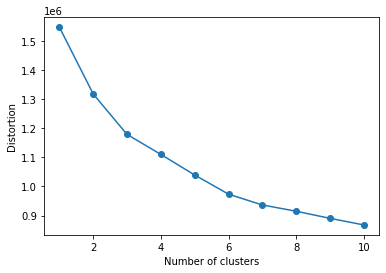

In [47]:

from sklearn.cluster import KMeans
# use the elbow method

# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X1)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [48]:
# use our optimal k
km = KMeans(
    n_clusters=4, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y1 = km.fit_predict(X1)
y2 = km.predict(X2)
y_km = km.predict(X)

In [49]:
# assign the split dataframes back to dataframe
train = pd.DataFrame(train,columns=df_new.columns)
test = pd.DataFrame(test,columns=df_new.columns)

In [50]:
# assign results back to the dataframes
train['Cluster'] = y1
test['Cluster'] = y2

##### Evaluate Results

In [51]:
# check out the train clusters

train.groupby(by='Cluster').mean()

,cust_service_mssgs,num_videos_completed,num_videos_rated,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,monthly_price,discount_price,cancel_before_trial_end,...,plan_type_high_uae_14_day_trial,plan_type_low_gbp_14_day_trial,payment_type_CBD,payment_type_Najim,payment_type_Paypal,payment_type_RAKBANK,payment_type_Standard Charter,payment_type_nan,Day of Week_Weekday,Day of Week_Weekend
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.371215,2.622366,0.068222,28.248319,1.993285,0.043429,54.376742,4.735709,4.516078,1.000000,...,0.003878,0.000000,0.047784,0.0249,0.329694,0.173074,0.424547,0.0,0.693118,0.306882
1,0.588555,3.047419,0.000455,27.691068,2.004291,0.031906,156.264657,4.735020,4.515115,0.079188,...,0.002039,0.000023,0.000000,0.0000,0.000000,0.000000,0.000000,1.0,0.693085,0.306915
2,0.565011,2.998339,0.000853,27.497740,2.008992,0.022537,1460.601364,4.734220,4.514004,0.094697,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,1.0,0.697919,0.302081
3,0.580952,3.001465,0.000411,27.758114,1.983040,0.036469,71.352461,4.735328,4.515561,0.073670,...,0.002982,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,1.0,0.694407,0.305593


In [52]:
# check out the test clusters

test.groupby(by='Cluster').mean()

,cust_service_mssgs,num_videos_completed,num_videos_rated,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,monthly_price,discount_price,cancel_before_trial_end,...,plan_type_high_uae_14_day_trial,plan_type_low_gbp_14_day_trial,payment_type_CBD,payment_type_Najim,payment_type_Paypal,payment_type_RAKBANK,payment_type_Standard Charter,payment_type_nan,Day of Week_Weekday,Day of Week_Weekend
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.375441,2.622361,0.068851,28.264062,1.995518,0.044548,54.701405,4.735774,4.516166,1.000000,...,0.004034,0.000000,0.049403,0.026091,0.324274,0.171498,0.428734,0.0,0.690728,0.309272
1,0.592890,3.047724,0.000555,27.694760,2.004963,0.031883,56.493929,4.735018,4.515104,0.080593,...,0.002003,0.000031,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.694255,0.305745
2,0.566764,3.003371,0.000754,27.480007,2.009891,0.023733,1124.002573,4.734153,4.513924,0.095111,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.699006,0.300994
3,0.578491,3.020475,0.000679,27.725897,1.982208,0.035831,80.031339,4.735435,4.515704,0.073438,...,0.003264,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.692565,0.307435


In [53]:
# check cluster proportions - train 
for i in [0,1]:
    print("Cluster {} is {}%".format(i,train['Cluster'].value_counts()[i]/17092.45))

Cluster 0 is 4.903568534645413%
Cluster 1 is 7.719899721806996%


In [54]:
# check cluster proportions - test
# for i in [0,1,2]:
for i in [0,1]:
    print("Cluster {} is {}%".format(i,test['Cluster'].value_counts()[i]/8418.68))

Cluster 0 is 4.916922843011018%
Cluster 1 is 7.70833432319556%


In [55]:
df_new['Cluster'] = y_km # predict on whole dataset

# check out the clusters - whole dataset 

df_new.groupby(by='Cluster').mean()

,cust_service_mssgs,num_videos_completed,num_videos_rated,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,monthly_price,discount_price,cancel_before_trial_end,...,plan_type_high_uae_14_day_trial,plan_type_low_gbp_14_day_trial,payment_type_CBD,payment_type_Najim,payment_type_Paypal,payment_type_RAKBANK,payment_type_Standard Charter,payment_type_nan,Day of Week_Weekday,Day of Week_Weekend
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.372612,2.622364,0.068430,28.253524,1.994023,0.043799,54.484076,4.735730,4.516107,1.000000,...,0.003929,0.000000,0.04832,0.025294,0.327902,0.172553,0.425931,0.0,0.692328,0.307672
1,0.589984,3.047519,0.000488,27.692285,2.004512,0.031898,123.373353,4.735020,4.515112,0.079651,...,0.002027,0.000025,0.00000,0.000000,0.000000,0.000000,0.000000,1.0,0.693471,0.306529
2,0.565590,3.000000,0.000820,27.491887,2.009288,0.022932,1349.489456,4.734198,4.513977,0.094834,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.0,0.698278,0.301722
3,0.580140,3.007736,0.000500,27.747487,1.982765,0.036258,74.215241,4.735364,4.515608,0.073593,...,0.003075,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.0,0.693799,0.306201


In [56]:
df_new.groupby(by='Cluster').mean().to_csv('Segmentation.csv')

In [57]:
# assign ticket id back to the dataset for further visualization
df_new = pd.concat([df_new,id_col],axis=1)

In [58]:
# save the result on the whole dataset to file 
df_new.to_csv('Result.csv')

In [59]:
df_new.head()

,cust_service_mssgs,num_videos_completed,num_videos_rated,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,monthly_price,discount_price,cancel_before_trial_end,...,payment_type_CBD,payment_type_Najim,payment_type_Paypal,payment_type_RAKBANK,payment_type_Standard Charter,payment_type_nan,Day of Week_Weekday,Day of Week_Weekend,Cluster,subid
3,0.0,7.0,0.0,20.051667,1.919271,False,29.0,4.7343,4.5141,False,...,0,0,0,0,0,1,1,0,2,20848497
4,1.0,6.0,0.0,20.051667,1.919271,False,29.0,4.7343,4.5141,False,...,0,0,0,0,0,1,1,0,2,20848497
5,1.0,5.0,0.0,20.051667,1.919271,False,29.0,4.7343,4.5141,False,...,0,0,0,0,0,1,1,0,2,20848497
6,0.0,5.0,0.0,20.051667,1.919271,False,29.0,4.7343,4.5141,False,...,0,0,0,0,0,1,1,0,2,20848497
7,0.0,4.0,0.0,20.051667,1.919271,False,29.0,4.7343,4.5141,False,...,0,0,0,0,0,1,1,0,2,20848497


# Churn model

In [60]:
df = subscribers.merge(customer_service_reps[['subid','renew']],on=['subid'])



In [61]:
subscribers[subscribers.age>100]

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,...,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type
628003,29067453,base,NaN,drama,access to exclusive content,27.301448,NaN,False,1955.0,False,...,7.0,False,2019-10-31,False,0.0000,0.0000,ar,False,False,NaN
3846,24614444,base,NaN,comedy,access to exclusive content,25.851492,NaN,False,1950.0,False,...,30.0,True,2019-09-07,False,0.0000,0.0367,ar,True,True,RAKBANK
114011,27685643,NaN,3.083053,NaN,expand regional access,27.301448,1.958566,False,1957.0,False,...,NaN,True,2019-07-16,False,3.4498,0.0000,ar,True,False,Paypal
403463,22568442,base,2.523382,other,supplement OTT,31.651317,1.874212,False,1969.0,False,...,4.0,False,2019-11-17,False,0.0000,0.0367,ar,False,False,NaN
377257,28637667,base,NaN,comedy,access to exclusive content,21.501623,NaN,False,165.0,False,...,7.0,False,2019-12-12,False,0.0000,0.0367,ar,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613698,28277755,base,2.367263,comedy,access to exclusive content,20.051667,1.903084,False,1962.0,False,...,NaN,True,2019-12-16,False,0.0000,0.0367,ar,False,False,NaN
293998,27306153,NaN,NaN,NaN,expand regional access,28.751405,NaN,False,1947.0,False,...,4.0,False,2019-07-17,False,0.0000,0.0000,ar,False,False,NaN
373164,26687096,NaN,2.560203,NaN,expand regional access,27.301448,1.825211,False,1956.0,False,...,9.0,False,2019-08-26,False,0.0000,0.0000,ar,False,False,NaN
101302,24035787,NaN,NaN,NaN,expand international access,30.201361,NaN,False,1956.0,False,...,NaN,True,2019-07-16,False,13.7992,0.0367,ar,True,False,Standard Charter


In [62]:
df.columns

Index(['subid', 'package_type', 'num_weekly_services_utilized',
       'preferred_genre', 'intended_use', 'weekly_consumption_hour',
       'num_ideal_streaming_services', 'retarget_TF', 'age', 'male_TF',
       'country', 'attribution_technical', 'attribution_survey', 'op_sys',
       'months_per_bill_period', 'plan_type', 'monthly_price',
       'discount_price', 'account_creation_date', 'creation_until_cancel_days',
       'cancel_before_trial_end', 'trial_end_date',
       'initial_credit_card_declined', 'revenue_net', 'join_fee', 'language',
       'paid_TF', 'refund_after_trial_TF', 'payment_type', 'renew'],
      dtype='object')

In [63]:
df['country'].value_counts()

UAE    209894
Name: country, dtype: int64

In [64]:
# 
df['payment_type'].value_counts()

Standard Charter    55858
Paypal              44052
RAKBANK             21173
CBD                  7618
Najim                3622
Apple Pay               8
Name: payment_type, dtype: int64

In [65]:
len(df)

209894

In [66]:
len(df.dropna())

5950

In [67]:
# change those > 1900 to 2020 - year
def clean_age(age):
    if age> 1920:
        ag = 2020 - age
    else:
        ag = age
    return ag
# df = df[df['age'] < 100]

In [68]:
df['age'] = df.apply(lambda row: clean_age(row['age']), axis=1) 
df = df[df['age'] < 100]
df = df[df['age'] > 0]

In [69]:
len(df)

158938

In [70]:
values = {'num_weekly_services_utilized': 0, 'weekly_consumption_hour': 0, 'num_ideal_streaming_services': 0, 
          'op_sys': 'unknownOp', 'creation_until_cancel_days' : 0, 'revenue_net' : 0, 'join_fee' : 0, 
          'payment_type' :'not_paid'}
df = df.fillna(value=values)


# change data type
df['preferred_genre'] = df['preferred_genre'].astype(str)
df['package_type'] = df['package_type'].astype(str)
df['intended_use'] = df['intended_use'].astype(str)
df['payment_type'] = df['payment_type'].astype(str)
df['op_sys'] = df['op_sys'].astype(str)

In [71]:
len(df.dropna())

151532

In [72]:
df = df.dropna()
id_col = df['subid']
df = df.drop(columns=['subid','country','account_creation_date','trial_end_date','language'])

In [73]:
df['payment_type'].value_counts()

not_paid            76672
Standard Charter    29282
Paypal              23430
RAKBANK             13353
CBD                  5811
Najim                2978
Apple Pay               6
Name: payment_type, dtype: int64

In [74]:
import pydotplus #pip install pydotplus
from sklearn.tree import export_graphviz

In [75]:
'''
Consultant will build a churn model and develop recommendation(s)
on an alternative product pricing structure as well as a distribution of expected CLV,
representing the uncertainty of future payments given the current customer base
'''

'\nConsultant will build a churn model and develop recommendation(s)\non an alternative product pricing structure as well as a distribution of expected CLV,\nrepresenting the uncertainty of future payments given the current customer base\n'

In [76]:
df['renew'] = df['renew'].astype(int)
df_input = pd.get_dummies(df)

In [77]:
len(df_input.columns)

101

In [78]:
# list(df_input.columns)

In [79]:
X = df_input.drop(columns=['renew'])
y = df[['renew']]

In [80]:
len(X)

151532

In [81]:
len(y)

151532

## 3 Decision tree

In [82]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3)
# As with other classifiers, DecisionTreeClassifier takes as input two arrays: an array X, 
# sparse or dense, of size [n_samples, n_features] holding the training samples, and an array Y of integer values,
# size [n_samples], holding the class labels for the training samples:


Feature ranking with recursive feature elimination and cross-validation

RFECV performs RFE in a cross-validation loop to find the optimal number or the best number of features. Hereafter a recursive feature elimination applied on logistic regression with automatic tuning of the number of features selected with cross-validation.

Optimal number of features: 1
Selected features: ['paid_TF']


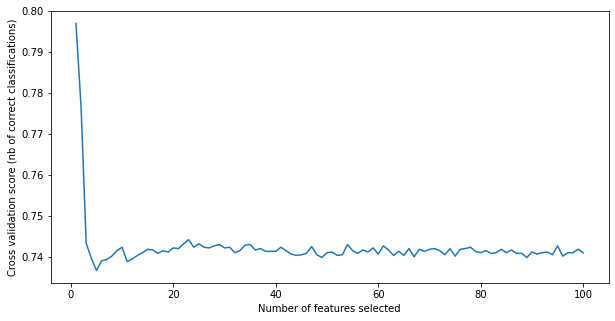

In [83]:
from sklearn.feature_selection import RFECV
def feature_selection_class(classifier, X, y):
    # Create the RFE object and compute a cross-validated score.
    # The "accuracy" scoring is proportional to the number of correct classifications
    rfecv = RFECV(estimator=classifier, step=1, cv=10, scoring='accuracy')
    rfecv.fit(X.head(6000), y.head(6000))

    print("Optimal number of features: %d" % rfecv.n_features_)
    print('Selected features: %s' % list(X.columns[rfecv.support_]))

    # Plot number of features VS. cross-validation scores
    plt.figure(figsize=(10,5))
    plt.xlabel("Number of features selected")
    plt.ylabel("Cross validation score (nb of correct classifications)")
    plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
    plt.show()
feature_selection_class(tree.DecisionTreeClassifier(), X, y)

In [84]:

# feature_selection_class(tree.DecisionTreeClassifier(), X.drop(columns=['paid_TF','payment_type_not_paid','revenue_net','cancel_before_trial_end']), y)

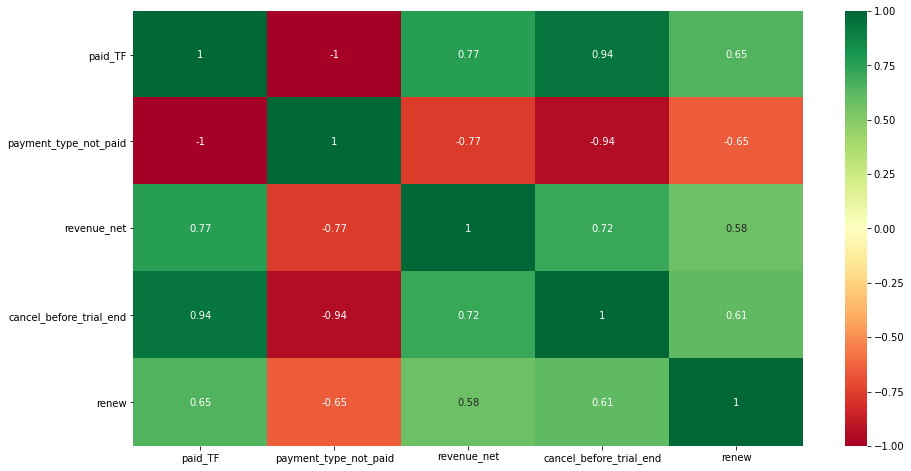

payment_type_not_paid   -0.652731
Name: renew, dtype: float64

In [85]:
a = df_input.corr()['renew']
import seaborn as sns
plt.subplots(figsize=(15, 8))
sns.heatmap(df_input[['paid_TF','payment_type_not_paid','revenue_net','cancel_before_trial_end','renew']].corr(), annot=True, cmap="RdYlGn")
plt.show()

a[a>0.5]
a[a<-0.5]

In [86]:
result_col = ['paid_TF','payment_type_not_paid','revenue_net','cancel_before_trial_end','renew']

In [87]:
['paid_TF','payment_type_not_paid','revenue_net','cancel_before_trial_end']

['paid_TF', 'payment_type_not_paid', 'revenue_net', 'cancel_before_trial_end']

In [95]:
from sklearn.feature_selection import RFE
def feature_selection_class2(classifier, X, y, num):
    # X = log_dataFrame[cols]
    # Build a logreg and compute the feature importances
#     model = tree.DecisionTreeClassifier()
    model = classifier
    # create the RFE model and select 5 attributes
    rfe = RFE(model, num)
    rfe = rfe.fit(X.head(5000), y.head(5000))
    # summarize the selection of the attributes
    print('Selected features: %s' % list(X.columns[rfe.support_]))
feature_selection_class2(tree.DecisionTreeClassifier(), X.drop(columns = ['paid_TF', 'payment_type_not_paid', 'revenue_net', 'cancel_before_trial_end']), y, 3)

d:\programs\python37\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Selected features: ['num_weekly_services_utilized', 'creation_until_cancel_days', 'refund_after_trial_TF']


In [96]:
cols = ['num_weekly_services_utilized', 'weekly_consumption_hour', 'num_ideal_streaming_services', 'age', 
        'creation_until_cancel_days', 'revenue_net', 'join_fee', 'intended_use_access to exclusive content', 
        'attribution_technical_brand sem intent google', 'attribution_technical_facebook', 'payment_type_not_paid']

In [97]:
cols = ['num_weekly_services_utilized', 'num_ideal_streaming_services', 'creation_until_cancel_days', 
        'revenue_net', 'payment_type_not_paid']

In [99]:
import graphviz 
# dot_data = tree.export_graphviz(clf, out_file=None, 
#                      feature_names=X[cols].columns,  
# #                      class_names=y.columns,  
#                      filled=True, rounded=True,  
#                      special_characters=True)  
# graph = graphviz.Source(dot_data)  
# graph.render("churn_only_3_features") 
# graph 

Optimal number of features: 1
Selected features: ['paid_TF']


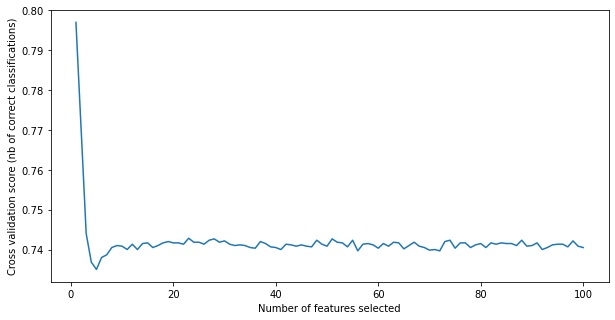

In [101]:
feature_selection_class(tree.DecisionTreeClassifier(), X, y)

In [107]:
# excluding the "outcome" type of features

feature_selection_class2(tree.DecisionTreeClassifier(), 
                        X.drop(columns = ['paid_TF', 'payment_type_not_paid', 'revenue_net', 
                                          'cancel_before_trial_end','creation_until_cancel_days'])
                        , y,3 )

d:\programs\python37\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Selected features: ['payment_type_Paypal', 'payment_type_RAKBANK', 'payment_type_Standard Charter']


Optimal number of features: 3
Selected features: ['payment_type_Paypal', 'payment_type_RAKBANK', 'payment_type_Standard Charter']


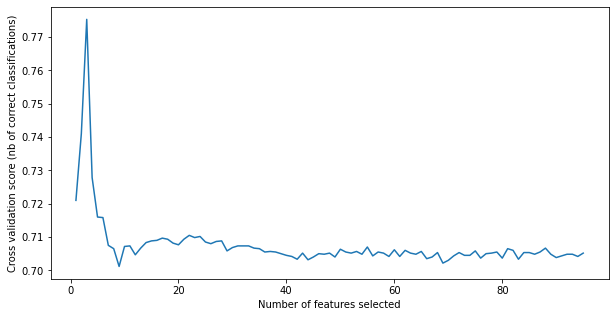

In [109]:
feature_selection_class(tree.DecisionTreeClassifier(), 
                        X.drop(columns = ['paid_TF', 'payment_type_not_paid', 'revenue_net'
                                          , 'cancel_before_trial_end','creation_until_cancel_days']), 
                        y)

Optimal number of features: 35
Selected features: ['weekly_consumption_hour', 'num_ideal_streaming_services', 'retarget_TF', 'age', 'initial_credit_card_declined', 'join_fee', 'refund_after_trial_TF', 'package_type_base', 'package_type_economy', 'preferred_genre_comedy', 'preferred_genre_nan', 'intended_use_access to exclusive content', 'intended_use_expand international access', 'intended_use_expand regional access', 'intended_use_other', 'intended_use_replace OTT', 'intended_use_supplement OTT', 'male_TF_False', 'attribution_technical_brand sem intent google', 'attribution_technical_email', 'attribution_technical_email_blast', 'attribution_technical_facebook', 'attribution_technical_google_organic', 'attribution_technical_organic', 'attribution_technical_pinterest', 'attribution_technical_referral', 'attribution_technical_search', 'attribution_survey_facebook', 'attribution_survey_referral', 'attribution_survey_search', 'attribution_survey_tv', 'op_sys_Android', 'op_sys_iOS', 'paymen

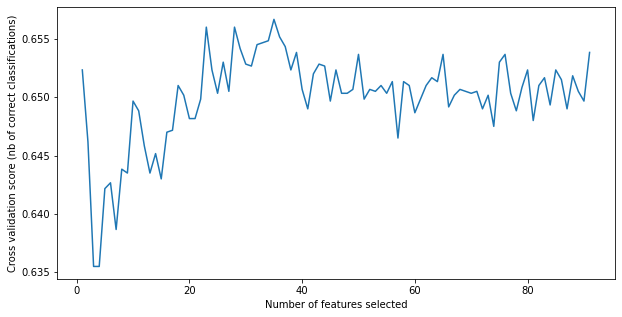

In [110]:
feature_selection_class(tree.DecisionTreeClassifier(), 
                        X.drop(columns = ['paid_TF', 'payment_type_not_paid', 'revenue_net'
                                          , 'cancel_before_trial_end','creation_until_cancel_days',
                                         'payment_type_Paypal', 'payment_type_RAKBANK', 
                                          'payment_type_Standard Charter','num_weekly_services_utilized']), 
                        y)

In [111]:
drop_cols = ['paid_TF', 'payment_type_not_paid', 'revenue_net'
                                          , 'cancel_before_trial_end','creation_until_cancel_days',
                                         'payment_type_Paypal', 'payment_type_RAKBANK', 
                                          'payment_type_Standard Charter','num_weekly_services_utilized']

d:\programs\python37\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass n_features_to_select=35 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Selected features: ['num_ideal_streaming_services', 'retarget_TF', 'age', 'months_per_bill_period', 'monthly_price', 'discount_price', 'initial_credit_card_declined', 'join_fee', 'refund_after_trial_TF', 'package_type_base', 'package_type_economy', 'package_type_enhanced', 'package_type_nan', 'preferred_genre_comedy', 'preferred_genre_drama', 'preferred_genre_international', 'attribution_survey_facebook', 'attribution_survey_public_radio', 'attribution_survey_referral', 'attribution_survey_search', 'attribution_survey_sirius xm', 'attribution_survey_social_organic', 'attribution_survey_tv', 'attribution_survey_youtube', 'op_sys_Android', 'op_sys_iOS', 'op_sys_unknownOp', 'plan_type_base_eur_14_day_trial', 'plan_type_base_uae_14_day_trial', 'plan_type_high_aud_14_day_trial', 'plan_type_high_sar_14_day_trial', 'plan_type_high_uae_14_day_trial', 'plan_type_low_gbp_14_day_trial', 'payment_type_Apple Pay', 'payment_type_CBD']


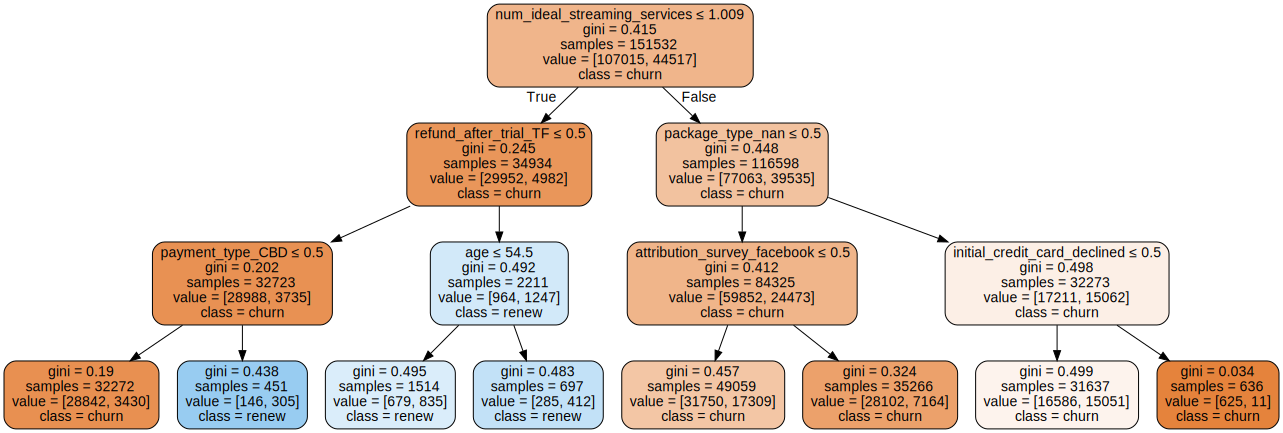

In [112]:
import graphviz 
num = 35
model = tree.DecisionTreeClassifier(max_depth=3)
# create the RFE model and select 5 attributes
rfe = RFE(model, num)
rfe = rfe.fit(X.drop(columns = drop_cols), y)
# summarize the selection of the attributes
col = list(X.drop(columns = drop_cols).columns[rfe.support_])
print('Selected features: %s' % list(X.drop(columns = drop_cols).columns[rfe.support_]))
# 2 define col
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X[col], y)
dot_data = tree.export_graphviz(clf, out_file=None, 
                 feature_names=X[col].columns,  
                 class_names=['churn','renew'],  
                 filled=True, rounded=True,  
                 special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("churn_only_" + str(num)+"_features.pdf") 

graph

## 4 Logistic regression model

Optimal number of features: 86
Selected features: ['weekly_consumption_hour', 'num_ideal_streaming_services', 'retarget_TF', 'age', 'months_per_bill_period', 'monthly_price', 'discount_price', 'initial_credit_card_declined', 'join_fee', 'refund_after_trial_TF', 'package_type_base', 'package_type_economy', 'package_type_enhanced', 'package_type_nan', 'preferred_genre_comedy', 'preferred_genre_drama', 'preferred_genre_international', 'preferred_genre_nan', 'preferred_genre_other', 'preferred_genre_regional', 'intended_use_access to exclusive content', 'intended_use_education', 'intended_use_expand international access', 'intended_use_expand regional access', 'intended_use_nan', 'intended_use_other', 'intended_use_replace OTT', 'intended_use_supplement OTT', 'male_TF_False', 'male_TF_True', 'attribution_technical_affiliate', 'attribution_technical_appstore', 'attribution_technical_bing', 'attribution_technical_bing_organic', 'attribution_technical_brand sem intent bing', 'attribution_tech

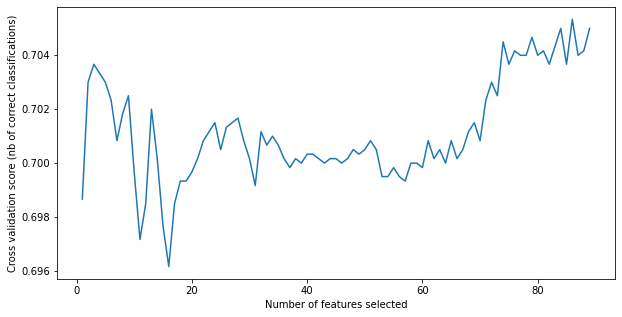

In [151]:
from sklearn.linear_model import LogisticRegression
feature_selection_class(LogisticRegression(), 
                        X.drop(columns = ['paid_TF', 'payment_type_not_paid', 'revenue_net'
                                          , 'cancel_before_trial_end','creation_until_cancel_days',
                                         'payment_type_Paypal', 'payment_type_RAKBANK', 
                                          'payment_type_Standard Charter','num_weekly_services_utilized',
                                         'payment_type_CBD', 'payment_type_Najim']), 
                        y)

In [113]:
X.shape

(151532, 100)

In [114]:
y.shape

(151532, 1)

In [126]:
from sklearn.datasets import load_iris

# clf = LogisticRegression(random_state=0).fit(X, y)

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
drop_cols = ['paid_TF', 'payment_type_not_paid', 'revenue_net'
                                          , 'cancel_before_trial_end','creation_until_cancel_days',
                                         'payment_type_Paypal', 'payment_type_RAKBANK', 
                                          'payment_type_Standard Charter','num_weekly_services_utilized']

X_train, X_test, y_train, y_test = train_test_split(X.drop(columns = drop_cols), y, test_size=0.2,random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X[col], y, test_size=0.2,random_state=42)


## 5 Confusion Matrix and ROC

Decision Tree

In [116]:
col

['num_ideal_streaming_services',
 'retarget_TF',
 'age',
 'months_per_bill_period',
 'monthly_price',
 'discount_price',
 'initial_credit_card_declined',
 'join_fee',
 'refund_after_trial_TF',
 'package_type_base',
 'package_type_economy',
 'package_type_enhanced',
 'package_type_nan',
 'preferred_genre_comedy',
 'preferred_genre_drama',
 'preferred_genre_international',
 'attribution_survey_facebook',
 'attribution_survey_public_radio',
 'attribution_survey_referral',
 'attribution_survey_search',
 'attribution_survey_sirius xm',
 'attribution_survey_social_organic',
 'attribution_survey_tv',
 'attribution_survey_youtube',
 'op_sys_Android',
 'op_sys_iOS',
 'op_sys_unknownOp',
 'plan_type_base_eur_14_day_trial',
 'plan_type_base_uae_14_day_trial',
 'plan_type_high_aud_14_day_trial',
 'plan_type_high_sar_14_day_trial',
 'plan_type_high_uae_14_day_trial',
 'plan_type_low_gbp_14_day_trial',
 'payment_type_Apple Pay',
 'payment_type_CBD']

In [117]:
from sklearn.metrics import ConfusionMatrixDisplay

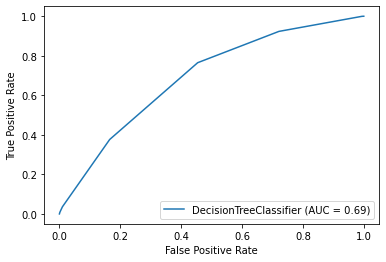

In [140]:
from sklearn.metrics import plot_roc_curve

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
clf = tree.DecisionTreeClassifier(max_depth=3)
# clf = tree.DecisionTreeClassifier(max_depth=10)
clf = clf.fit(X_train, y_train)

clf_disp = plot_roc_curve(clf, X_test, y_test)

Logistic Regression

d:\programs\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
d:\programs\python37\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


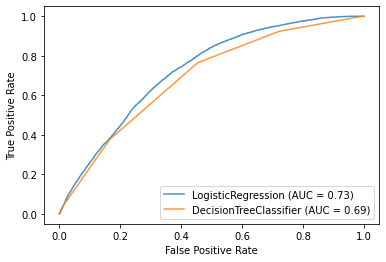

In [142]:
# log = make_pipeline(StandardScaler(), LogisticRegression(random_state=0))
log = LogisticRegression()
log.fit(X_train, y_train)




ax = plt.gca()
rfc_disp = plot_roc_curve(log, X_test, y_test, ax=ax, alpha=0.8)
clf_disp.plot(ax=ax, alpha=0.8)

Text(0.5, 0, 'Predicted label')

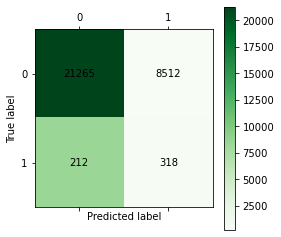

In [145]:
# clf
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm,cmap=plt.cm.Greens)
# m.Greens
plt.colorbar()
for x in range(len(cm)):
    for Y in range(len(cm)):
        plt.annotate(cm[x,Y],xy=(x,Y),horizontalalignment='center',verticalalignment='center')
plt.ylabel('True label')
plt.xlabel('Predicted label')

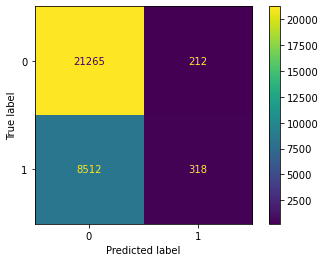

In [152]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

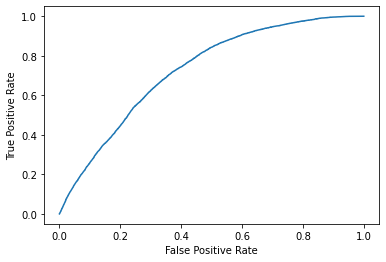

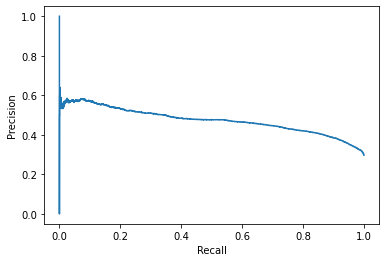

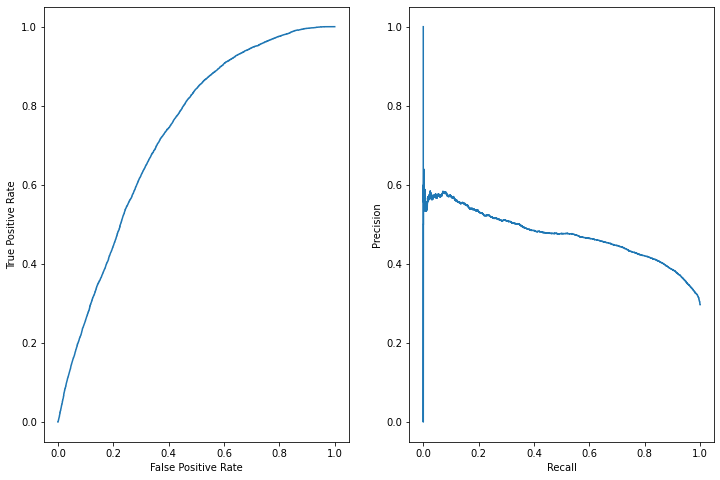

In [156]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
y_score = log.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()


from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

prec, recall, _ = precision_recall_curve(y_test, y_score,
                                         pos_label=clf.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()


import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

roc_display.plot(ax=ax1)
pr_display.plot(ax=ax2)
plt.show()

In [160]:
X_train.head()

,num_ideal_streaming_services,retarget_TF,age,months_per_bill_period,monthly_price,discount_price,initial_credit_card_declined,join_fee,refund_after_trial_TF,package_type_base,...,op_sys_iOS,op_sys_unknownOp,plan_type_base_eur_14_day_trial,plan_type_base_uae_14_day_trial,plan_type_high_aud_14_day_trial,plan_type_high_sar_14_day_trial,plan_type_high_uae_14_day_trial,plan_type_low_gbp_14_day_trial,payment_type_Apple Pay,payment_type_CBD
134533,0.000000,False,50.0,4,4.7343,4.5141,False,0.6606,False,0,...,1,0,0,1,0,0,0,0,0,0
56322,2.011166,False,30.0,4,4.7343,4.5141,False,0.0000,False,1,...,1,0,0,1,0,0,0,0,0,0
190189,1.869206,False,63.0,4,4.7343,4.5141,False,0.0367,False,0,...,0,0,0,1,0,0,0,0,0,0
181398,1.865365,False,47.0,4,4.7343,4.5141,False,0.0367,False,0,...,0,0,0,1,0,0,0,0,0,0
136305,2.309905,False,47.0,4,4.7343,4.5141,False,0.1101,False,1,...,1,0,0,1,0,0,0,0,0,0


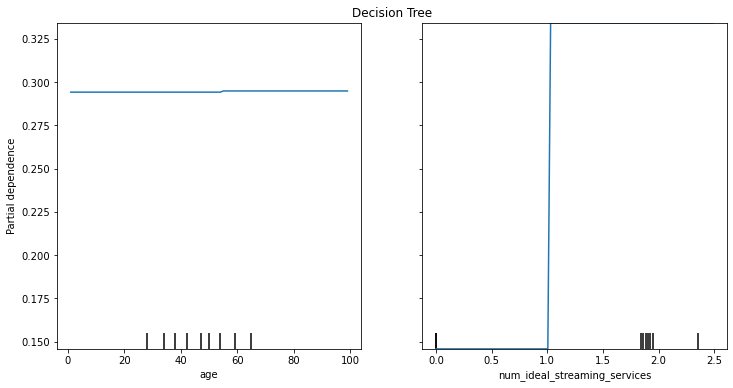

In [161]:
from sklearn.inspection import plot_partial_dependence
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Decision Tree")
tree_disp = plot_partial_dependence(clf, X_train, ["age",'num_ideal_streaming_services'], ax=ax)

Text(0.5, 0, 'Predicted label')

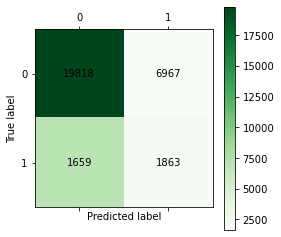

In [144]:
# log
from sklearn.metrics import confusion_matrix
y_pred = log.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm,cmap=plt.cm.Greens)
# m.Greens
plt.colorbar()
for x in range(len(cm)):
    for Y in range(len(cm)):
        plt.annotate(cm[x,Y],xy=(x,Y),horizontalalignment='center',verticalalignment='center')
plt.ylabel('True label')
plt.xlabel('Predicted label')



## 6 Customer Lifetime Value

In [167]:
id_col.head()

0    26844789
1    29726122
2    29726122
3    20299962
4    20299962
Name: subid, dtype: int64

In [166]:
df.head()

,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,attribution_technical,...,discount_price,creation_until_cancel_days,cancel_before_trial_end,initial_credit_card_declined,revenue_net,join_fee,paid_TF,refund_after_trial_TF,payment_type,renew
0,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,organic,...,4.5141,1.0,False,False,0.0000,0.1101,False,False,not_paid,0
1,base,2.049135,comedy,access to exclusive content,20.051667,1.860289,False,61.0,False,bing,...,4.5141,0.0,True,False,4.5875,0.3303,True,False,Standard Charter,1
2,base,2.049135,comedy,access to exclusive content,20.051667,1.860289,False,61.0,False,bing,...,4.5141,0.0,True,False,4.5875,0.3303,True,False,Standard Charter,0
3,base,3.002048,drama,access to exclusive content,34.551230,1.870503,False,23.0,False,email,...,4.5141,0.0,True,False,3.4498,0.0000,True,False,RAKBANK,1
4,base,3.002048,drama,access to exclusive content,34.551230,1.870503,False,23.0,False,email,...,4.5141,0.0,True,False,3.4498,0.0000,True,False,RAKBANK,0


In [170]:
df['revenue_net'].head()

0    0.0000
1    4.5875
2    4.5875
3    3.4498
4    3.4498
Name: revenue_net, dtype: float64

In [163]:
X

,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,months_per_bill_period,monthly_price,discount_price,creation_until_cancel_days,cancel_before_trial_end,...,plan_type_high_sar_14_day_trial,plan_type_high_uae_14_day_trial,plan_type_low_gbp_14_day_trial,payment_type_Apple Pay,payment_type_CBD,payment_type_Najim,payment_type_Paypal,payment_type_RAKBANK,payment_type_Standard Charter,payment_type_not_paid
0,3.362885,36.001186,1.951776,False,25.0,4,4.7343,4.5141,1.0,False,...,0,0,0,0,0,0,0,0,0,1
1,2.049135,20.051667,1.860289,False,61.0,4,4.7343,4.5141,0.0,True,...,0,0,0,0,0,0,0,0,1,0
2,2.049135,20.051667,1.860289,False,61.0,4,4.7343,4.5141,0.0,True,...,0,0,0,0,0,0,0,0,1,0
3,3.002048,34.551230,1.870503,False,23.0,4,4.7343,4.5141,0.0,True,...,0,0,0,0,0,0,0,1,0,0
4,3.002048,34.551230,1.870503,False,23.0,4,4.7343,4.5141,0.0,True,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209889,0.000000,28.751405,0.000000,False,61.0,4,4.7343,4.5141,0.0,False,...,0,0,0,0,0,0,0,0,0,1
209890,2.169904,24.401536,1.881068,False,43.0,4,4.7343,4.5141,11.0,False,...,0,0,0,0,0,0,0,0,0,1
209891,2.594078,28.751405,1.905485,False,38.0,4,4.7343,4.5141,8.0,False,...,0,0,0,0,0,0,0,0,0,1
209892,2.361370,27.301448,1.835189,True,49.0,4,4.7343,4.5141,0.0,True,...,0,0,0,0,0,0,1,0,0,0


In [172]:
from sklearn.model_selection import train_test_split
drop_cols = ['paid_TF', 'payment_type_not_paid', 'revenue_net'
                                          , 'cancel_before_trial_end','creation_until_cancel_days',
                                         'payment_type_Paypal', 'payment_type_RAKBANK', 
                                          'payment_type_Standard Charter','num_weekly_services_utilized']

X_train, X_test, y_train, y_test = train_test_split(X.drop(columns = drop_cols), y, test_size=0.05,random_state=42)

log = LogisticRegression()
log = log.fit(X_train,y_train)

In [174]:
prob_list = [renew for renew, churn in log.predict_proba(X.drop(columns = drop_cols))]

In [177]:
prob_list[1:10]

[0.7261671245082209,
 0.7261671245082209,
 0.8123141328142311,
 0.8123141328142311,
 0.9270975978280358,
 0.8862471829100999,
 0.6174895556199471,
 0.7911038113703474,
 0.9223666593475623]

In [179]:
df['revenue_net'][1:10]

1     4.5875
2     4.5875
3     3.4498
4     3.4498
5     0.0000
6     0.0000
7     0.0000
8     0.0000
11    0.0000
Name: revenue_net, dtype: float64

In [257]:
l = [1,2,3]

In [263]:
l[2] = l[2]+1

In [264]:
l

[1, 2, 6]

In [266]:
all_churn_list = list(df['revenue_net'])

In [268]:
sum(all_churn_list)

455303.4296001557

In [271]:
df.revenue_net

0         0.0000
1         4.5875
2         4.5875
3         3.4498
4         3.4498
           ...  
209889    0.0000
209890    0.0000
209891    0.0000
209892    4.5875
209893    4.5875
Name: revenue_net, Length: 151532, dtype: float64

In [272]:
import random

# using r_year = 0.1 as default
r_year = 0.1
# effective discount rate of each month
r = pow(1+r_year,1/12)-1

revenue_list = list(df['revenue_net'])
# 0 if churned
all_churn_list = list(df['revenue_net'])


t=1
while sum(all_churn_list) != 0:
    
    for i in range(len(prob_list)):
        if all_churn_list[i] != 0:
            if random.random() < prob_list[i]:
                revenue_list[i] = revenue_list[i] + revenue_list[i]/pow(1+r,t)
            else:
                all_churn_list[i] = 0

    t += 1

In [ ]:
df = customer_service_reps.copy()
customer_service_reps.head()

In [ ]:
# 2020年2月 1.75%
r_year = 1.75/100
# effective discount rate of each month
r = pow(1+r_year,1/12)-1
df['last_payment'] = pd.to_datetime(df['last_payment'])

### An overall result of clv

In [ ]:
df['last_payment'].max() - df['last_payment'].min()

In [ ]:
# 2019 June as our base ()
df['last_payment'].min()

In [ ]:
df['last_payment'].max()

In [ ]:
df['paid_year'] = df['last_payment'].dt.year
df['paid_month'] = df['last_payment'].dt.month

In [ ]:
df.head()

In [ ]:
# basic discount period example
year = 2020
month = 6
p = 0
if year == 2019:
    p = month - 6
if year == 2020:
    p += 6+month
print(p)

def discount_period(year, month):
    p = 0
    if year == 2019:
        p = month - 6
    if year == 2020:
        p += 6+month
    return p

In [ ]:
df['dicount_period'] = df.apply(lambda row: discount_period(row['paid_year'], row['paid_month']), axis=1) 

In [ ]:
df.groupby(['dicount_period']).sum()['revenue_net_1month']

In [ ]:
a = df.groupby(['dicount_period']).sum()['revenue_net_1month']
clv_df = pd.DataFrame(list(a),index=a.index, columns=['revenue_net'])
clv_df['dicount_period'] = range(11)
clv_df['discounted_value'] = clv_df['revenue_net']/pow(1+r,clv_df['dicount_period'])

In [ ]:
# clv
clv_df['discounted_value'].sum()/len(np.unique(customer_service_reps['customer_service_rep_id']))

In [ ]:
# CLV of different channel

In [ ]:
a = df.groupby(['dicount_period','billing_channel']).sum()['revenue_net_1month']

In [ ]:
discount_factor = list(pow(1+r,clv_df['dicount_period']))

In [ ]:
np.array([[d]*3 for d in discount_factor]).reshape(33,)

In [ ]:
a/np.array([[d]*3 for d in discount_factor]).reshape(33,)

In [ ]:
b = a/np.array([[d]*3 for d in discount_factor]).reshape(33,)
channel_clv = pd.DataFrame(list(a),index=a.index, columns=['discounted_value'])
channel_clv['channel'] = [channel for ind, channel in list(channel_clv.index)]

In [ ]:
channel_clv.groupby('channel').sum()

In [ ]:
# of different num_trial_days

In [ ]:
df['num_trial_days'] = df['num_trial_days'].astype(str)

a = df.groupby(['dicount_period','num_trial_days']).sum()['revenue_net_1month']
b = a/np.array([[d]*3 for d in discount_factor]).reshape(33,)
trial_day_clv = pd.DataFrame(list(a),index=a.index, columns=['discounted_value'])
trial_day_clv['trial'] = [trial for ind, trial in list(trial_day_clv.index)]

In [ ]:
trial_day_clv

In [ ]:
trial_day_clv.groupby('trial').sum()